# Project 3
## B-IT Pattern Recognition



Presented on 4-Jan-2016 by:

- Abdullah Abdullah

- Can Güney Aksakallı

- Kang Cifong

- Umut Hatipoğlu

***

In [1]:
import numpy as np
import timeit
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans, kmeans2

import pattrex.plotting_mpl as plt_rex
import pattrex.dimred as dim_rex
import pattrex.fun_with_k_means as km_rex
import pattrex.SpectralClustering as sc_rex
import pattrex.SpectralClustering_AndrewNg as scan_rex
from pattrex.demo_helper import read_whdata
import pattrex.preprocessing as pre_rex

## Task 3.1
### Fun with k-means clustering
***

In [2]:
def demo_1_data():
    data = np.genfromtxt("./data/data-clustering-1.csv", delimiter=',')
    print("{} samples of {} dimensional data".format(*(data.T).shape))
    
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111)
    
    plt_rex.plot2d(data, colwise_data=True, show=False, hatch='k.', 
                   title="Data", axs=ax)
    
    return data.T

### The Data

200 samples of 2 dimensional data


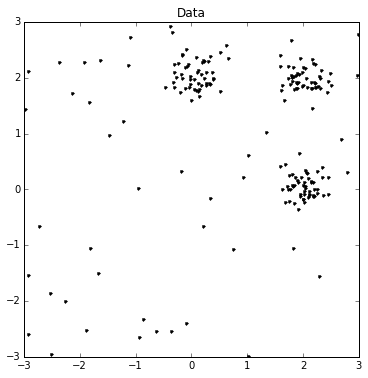

In [3]:
mydata = demo_1_data()

In [4]:
def demo_1_init(data, k, seed=9000):
    nX, mX = data.shape
    np.random.seed(seed)
    
    # Random choices from data
    m1 = np.copy(data[np.random.choice(np.arange(nX), size=k)])
    
    np.random.seed(seed + seed)
    
    # Random choice of one
    m2 = np.copy(data[np.random.choice(np.arange(nX), size=k)])
    
    # explicit init
    m3 = np.array([
            [2, 2],
            [0, 2],
            [2, 0]
        ])
    
    return m1, m2, m3

In [5]:
def demo_1_lloyd(data, k):
    inits = demo_1_init(data, k, seed=800)
    titles = [
        "Lloyd's - {} random choices to init 1".format(k),
        "Lloyd's - {} random choices to init 2".format(k),
        "Lloyd's - human init",
    ]
    fig = plt.figure(figsize=(15, 5))
    sp = [1, 3, 0]
    
    for i, t in zip(inits, titles):
        try:
            m, l = km_rex.lloyd2(data, i, verbose=True)
        except UserWarning:
            print("Did not converge for {}".format(t))
        
        # plotting
        sp[-1] += 1
        ax = fig.add_subplot(*sp)
        
        h_d = ['r.', 'g.', 'b.']
        h_m = ['rs', 'gs', 'bs']
        h_i = ['ko', 'ko', 'ko']
        for c, hd, hm, hi in zip(range(k), h_d , h_m, h_i):
            plt_rex.plot2d(data[l == c], False, show=False, axs=ax,
                           hatch=hd, 
                           title=t)
            plt_rex.plot2d(m[c, :].reshape(1, m.shape[1]), False, show=False, 
                           axs=ax, hatch=hm)
            plt_rex.plot2d(i[c, :].reshape(1, m.shape[1]), False, show=False, 
                           axs=ax, hatch=hi)
            
def demo_1_hart(data, k, seeds):
    titles = ["Hartigan's - Random Seed {}".format(s) for s in seeds]
    fig = plt.figure(figsize=(15, 5))
    sp = [1, 3, 0]
    
    for s, t in zip(seeds, titles):
        try:
            m, l = km_rex.hartigan2(data, k, seed=s)
        except UserWarning:
            print("Did not converge for {}".format(t))
        
        # plotting
        sp[-1] += 1
        ax = fig.add_subplot(*sp)
        
        h_d = ['r.', 'g.', 'b.']
        h_m = ['rs', 'gs', 'bs']
#         h_i = ['ko', 'ko', 'ko']
        for c, hd, hm in zip(range(k), h_d , h_m):
            plt_rex.plot2d(data[l == c], False, show=False, axs=ax,
                           hatch=hd, 
                           title=t)
            plt_rex.plot2d(m[c, :].reshape(1, m.shape[1]), False, show=False, 
                           axs=ax, hatch=hm)
#             plt_rex.plot2d(i[c, :].reshape(1, m.shape[1]), False, show=False, 
#                            axs=ax, hatch=hi)

def demo_1_macqueen(data, k, seeds):
    titles = ["MacQueen's"] + \
        ["MacQueen's - Random shuffle {}".format(s) for s in seeds]
    fig = plt.figure(figsize=(15, 5))
    sp = [1, 3, 0]
    
    datas = [np.copy(data)]
    for s in seeds:
        np.random.seed(s)
        np.random.shuffle(data)
        datas.append(np.copy(data))
        
    
    for d, t in zip(datas, titles):
        try:
            m, l = km_rex.mcqueen2(d, k)
        except UserWarning:
            print("Did not converge for {}".format(t))
        
        # plotting
        sp[-1] += 1
        ax = fig.add_subplot(*sp)
        
        h_d = ['r.', 'g.', 'b.']
        h_m = ['rs', 'gs', 'bs']
        h_i = ['ko', 'ko', 'ko']
        i = d[:k, :]
        for c, hd, hm, hi in zip(range(k), h_d , h_m, h_i):
            plt_rex.plot2d(d[l == c], False, show=False, axs=ax,
                           hatch=hd, 
                           title=t)
            plt_rex.plot2d(m[c, :].reshape(1, m.shape[1]), False, show=False, 
                           axs=ax, hatch=hm)
            plt_rex.plot2d(i[c, :].reshape(1, m.shape[1]), False, show=False, 
                           axs=ax, hatch=hi)

### Lloyd's Algorithm

- Very Sensitive to initialization values

- Converges, but no guarantees (esp in case of bad initializations)

- No Guarantee about the results either

- Really Fast (if no catastrophy)

Converged after 4 iterations
Converged after 9 iterations
Converged after 3 iterations


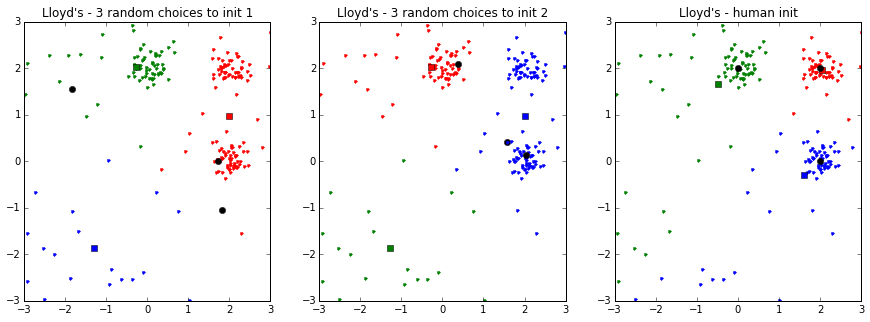

In [6]:
demo_1_lloyd(mydata, 3)

In [7]:
def demo_1_lloyd2(data, k, dist, seed):
    i = demo_1_init(data, k, seed=seed)[0]
    titles = [
        "Lloyd's - random choices to init - {}".format(d) for d in dist]
    fig = plt.figure(figsize=(15, 5))
    sp = [1, 3, 0]
    
    for d, t in zip(dist, titles):
        try:
            m, l = km_rex.lloyd2(data, i, verbose=True, metric=d)
        except UserWarning:
            print("Did not converge for {}".format(t))
        
        # plotting
        sp[-1] += 1
        ax = fig.add_subplot(*sp)
        
        h_d = ['r.', 'g.', 'b.']
        h_m = ['rs', 'gs', 'bs']
        h_i = ['ko', 'ko', 'ko']
        for c, hd, hm, hi in zip(range(k), h_d , h_m, h_i):
            plt_rex.plot2d(data[l == c], False, show=False, axs=ax,
                           hatch=hd, 
                           title=t)
            plt_rex.plot2d(m[c, :].reshape(1, m.shape[1]), False, show=False, 
                           axs=ax, hatch=hm)
            plt_rex.plot2d(i[c, :].reshape(1, m.shape[1]), False, show=False, 
                           axs=ax, hatch=hi)

### Different Similarity Measures

- The data does seem to have **Gaussian Blobs**

    + The problem with the data is different
    
- Different similarity metric will probably not give different results
    
    + Except in case of relatively bad similarity metrics

Converged after 4 iterations
Converged after 4 iterations
Converged after 4 iterations
Converged after 5 iterations
Converged after 5 iterations
Converged after 5 iterations


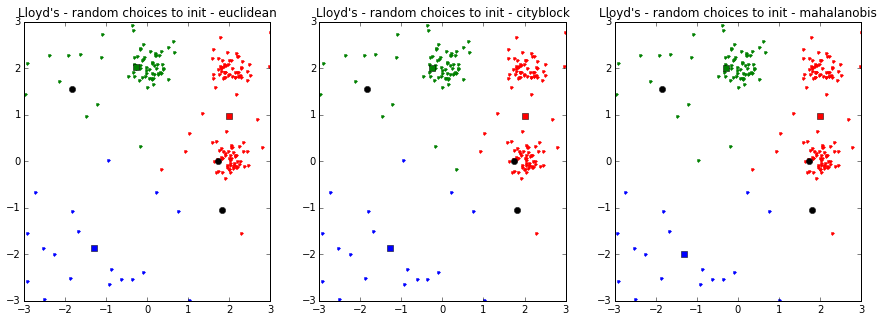

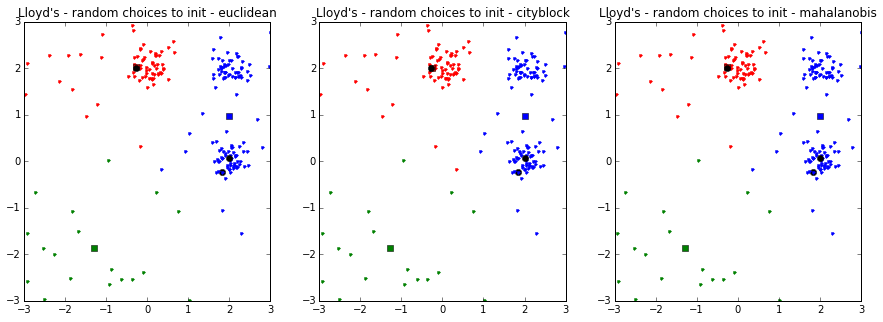

In [8]:
demo_1_lloyd2(mydata, 3, ['euclidean', 'cityblock', 'mahalanobis'], 800)
demo_1_lloyd2(mydata, 3, ['euclidean', 'cityblock', 'mahalanobis'], 999)

### Hartigan's Algorithm
- Converges quickly

- Still sensitive to initialization of classes

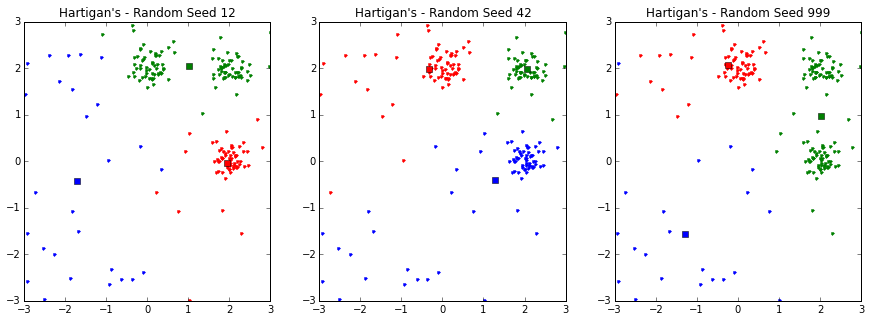

In [9]:
demo_1_hart(mydata, 3, [12, 42, 999])  # These took some time to choose

#### Smarter Way?

- We couldn't figure out any smarter way, than :
    
    + only recalculate objective function for the current class
        
        + Not reliable, esp when the data is disproportionate among classes
    
    + Halved the number of data points for which the distance is calculated, compared to Naive
    
        + Does not fully utilize the potential, eg vectorization

### MacQueen's Algorithm

- Convenient for streams

- Sensitive to order of data
    
    + Essentially, still sensitive to initialization

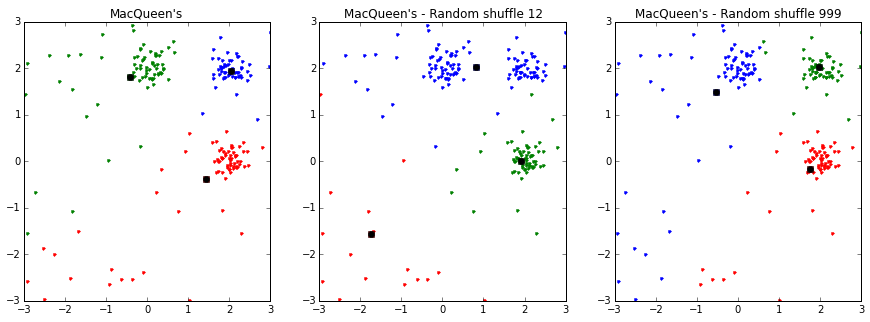

In [10]:
demo_1_macqueen(mydata, 3, [12, 999])

In [51]:
def demo_1_t():
    print("Mac OSX - 10.11.3")
    print("2,9 GHz Intel Core i7")
    print("Python 3.4")
    print("\nLloyd - Naive")
    %timeit km_rex.kmeans_Lloyd(mydata, 3, init_c, save_plot=False)
    
    print("\nLloyd - 2")
    %timeit km_rex.lloyd2(mydata, init_c, verbose=False)
    
    print("\nLloyd - sklearn.cluster.KMeans")
    %timeit KMeans(n_clusters=3).fit(mydata)
    
    print("\n?? - scipy.cluster.vq.kmeans")
    %timeit kmeans(mydata, 3, check_finite=False)
    
    print("\n?? - scipy.cluster.vq.kmeans2")
    %timeit kmeans2(mydata, 3, minit='points', check_finite=False)
    
    print("\nHartigan - Naive")
    %timeit km_rex.kmeans_hartigans(mydata, 3, save_plot=False, show_plot=False)
    
    print("\nHartigan - 2")
    %timeit km_rex.hartigan2(mydata, 3, seed=9000)
    
    print("\nMacQueen - Naive")
    %timeit km_rex.kmeans_macqueen(mydata, 3, save_plot=False)
    
    print("\nMacQueen - 2 (numpy-ed)")
    %timeit km_rex.mcqueen2(mydata, 3)
    
    t = [
        (32e-3, "LN"),
        (833e-6, "L2"),
        (15.1e-3, "Lsk"),
        (10.8e-3, "?sp"),
        (880e-6, "?sp2"),
        (354e-3, "HN"),
        (66.7e-3, "H2"),
        (18.1e-3, "MN"),
        (9.44e-3, "M2")
    ]
    
    tt = [t_[0] for t_ in t]
    tl = [t_[1] for t_ in t]
    
    fig, ax = plt.subplots()
    ax.bar(np.arange(len(tt)), tt)
    ax.set_xticklabels(tl)
    

### Run times!

Mac OSX - 10.11.3
2,9 GHz Intel Core i7
Python 3.4

Lloyd - Naive
10 loops, best of 3: 31.5 ms per loop

Lloyd - 2
1000 loops, best of 3: 864 µs per loop

Lloyd - sklearn.cluster.KMeans
100 loops, best of 3: 15.3 ms per loop

?? - scipy.cluster.vq.kmeans
100 loops, best of 3: 10.6 ms per loop

?? - scipy.cluster.vq.kmeans2
1000 loops, best of 3: 906 µs per loop

Hartigan - Naive
1 loops, best of 3: 488 ms per loop

Hartigan - 2
10 loops, best of 3: 67.1 ms per loop

MacQueen - Naive
100 loops, best of 3: 18.5 ms per loop

MacQueen - 2 (numpy-ed)
100 loops, best of 3: 9.41 ms per loop


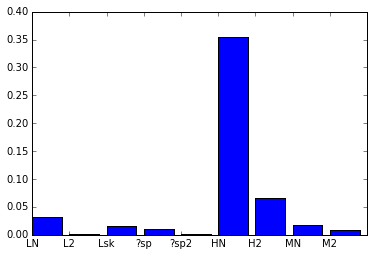

In [53]:
np.random.seed(9000)
init_c = np.copy(mydata[np.random.choice(np.arange(mydata.shape[0]), size=3)])
demo_1_t()

## Task 3.2
### Spectral Clustering
***

### Syllabus
- Apply K-means

- Apply Spectral Clustering

- Apply Spectral Clustering using Andrew Ng's Alorithm

In [56]:
def demo_2_1():
    my_data = np.genfromtxt('data/data-clustering-2.csv', delimiter=',')
    x = my_data[0,:]
    y = my_data[1,:]

    # plotting
    fig = plt.figure(figsize=(12, 8))
    axs = fig.add_subplot(111)

    plt_rex.plot2d(my_data, colwise_data=True, hatch='bo', 
                  show=False, axs=axs, set_aspect_equal=False, 
                   title="data")
    
    return my_data

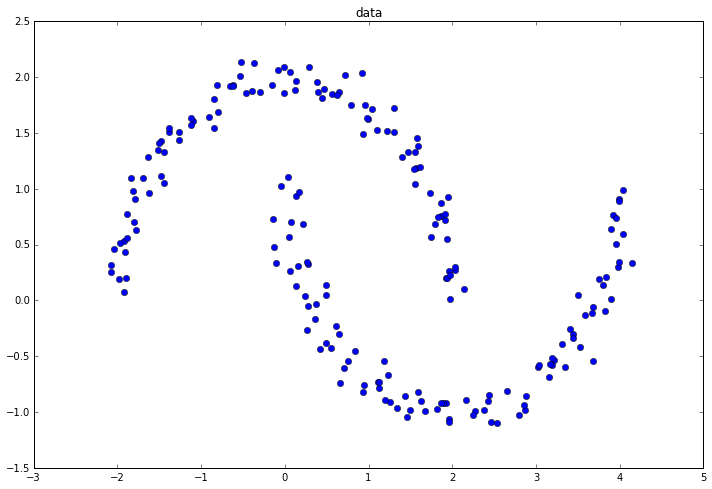

In [57]:
my_data = demo_2_1()

### Apply K-means on Data

In [65]:
def demo_2_2(my_data):
    k = 2
    data = my_data.T
    centroidsInit = np.array([[1, 2], [3, 4]])
    centroids, idx = km_rex.lloyd2(data, centroidsInit, verbose=False)
    # idx, _ = km_rex.vq(data, centroids)
    km_rex.show_plotted_cluster(data, idx, centroids, "Lloyd's algorithm",k)

    # Hartigan's algorithm
    centroids, idx = km_rex.hartigan2(data, k)
    km_rex.show_plotted_cluster(data, idx, centroids, "Hartigan's algorithm",k)

    # MacQueen's algorithm
    centroids, idx = km_rex.mcqueen2(data, k)
    km_rex.show_plotted_cluster(data, idx, centroids, "MacQueen's algorithm",k)

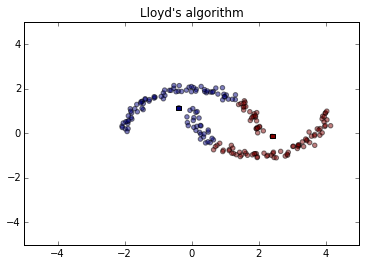

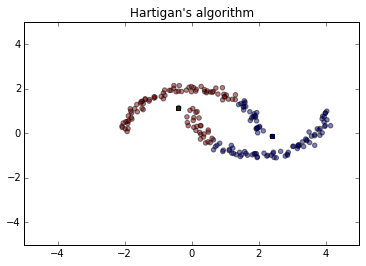

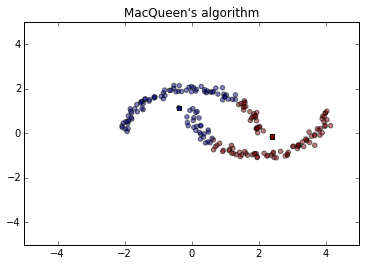

In [66]:
demo_2_2(my_data)

## Apply Spectral Clustering on Data
- Get a good result at beta = 11
- By observation, we see that some edges points would be mis-judged as beta grows from 1 to 15
- The Upper half contains 100 points, and so is the lower half.

### Play around the number of halfs
- See how the number of halfs changes

In [12]:
def demo_2_4(my_data):
    for i in np.arange(1,20,1):
        ur,index,u_idx_pos,u_idx_neg = sc_rex.SpectralClustering(my_data, i)
        if(len(u_idx_pos[0])>=(len(u_idx_neg[0]))):
            print(i,len(u_idx_pos[0]))
        else:
            print(i,len(u_idx_neg[0]))
        if(len(u_idx_pos[0])==(len(u_idx_neg[0]))):
            print("Got",i," with 100 each")
            sc_rex.plot(my_data,ur,index,u_idx_pos,u_idx_neg)

1 103
2 104
3 101
4 104
5 109
6 114
7 116
8 116
9 115
10 107
11 100
Got 11  with 100 each
12 114
13 105
14 112
15 113
16 113
17 114
18 121
19 107


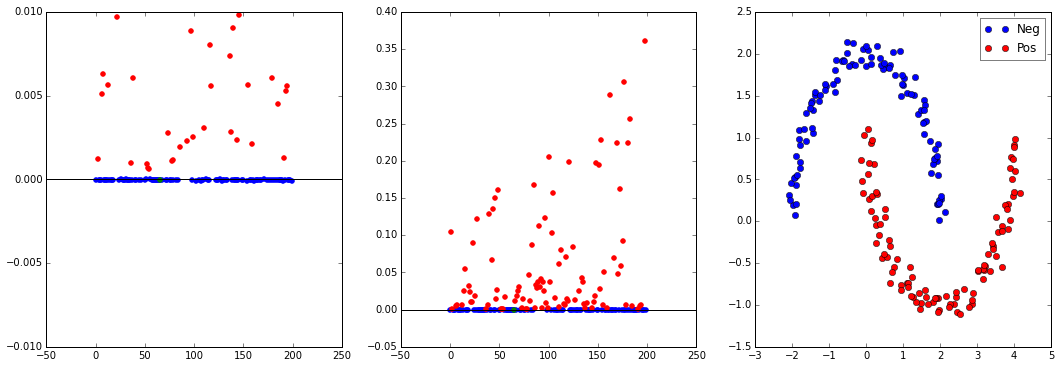

In [13]:
demo_2_4(my_data)

## Exam the Laplacian Matrix
- S = exp(-beta* |x_i-x_j|^2) which is indepandent on the data order
- D = Sum(j to n)(Sij) if i=j which is depandent on the data order
- L = D - S 

### Shuffle the data order to see the result
- we would have a differnet beta or even unable to get one sometime. Sometimes we got a lot
- But we see that the upper half gathered close to y=0 line, while the lower half spread around.

In [15]:
def demo_2_5(my_data):
    idx = np.arange(0,200,1)
    np.random.shuffle(idx)
    
    for i in np.arange(1,20,1):
        ur,index,u_idx_pos,u_idx_neg = sc_rex.SpectralClustering(my_data[:,idx], i)
        if(len(u_idx_pos[0])==(len(u_idx_neg[0]))):
            print("Got",i)
        sc_rex.plot(my_data[:,idx],ur,index,u_idx_pos,u_idx_neg)

Got 5
Got 16


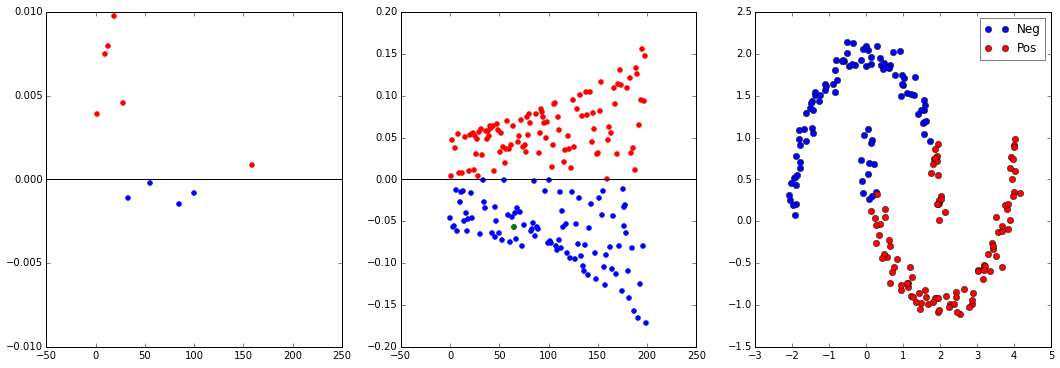

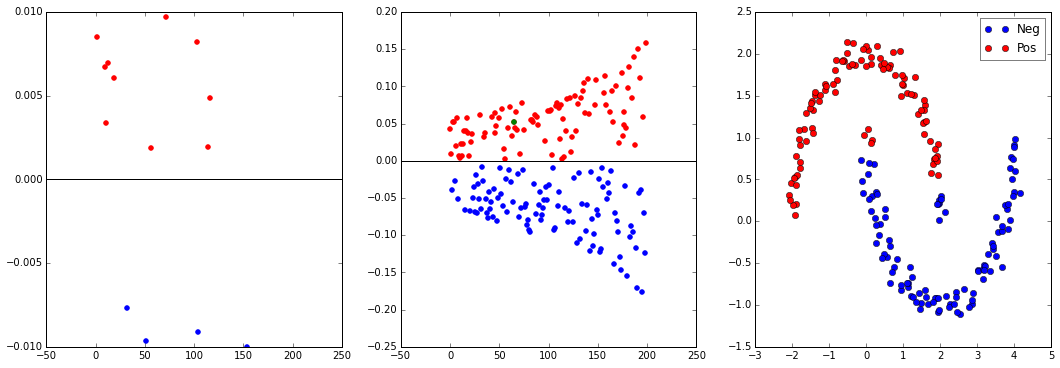

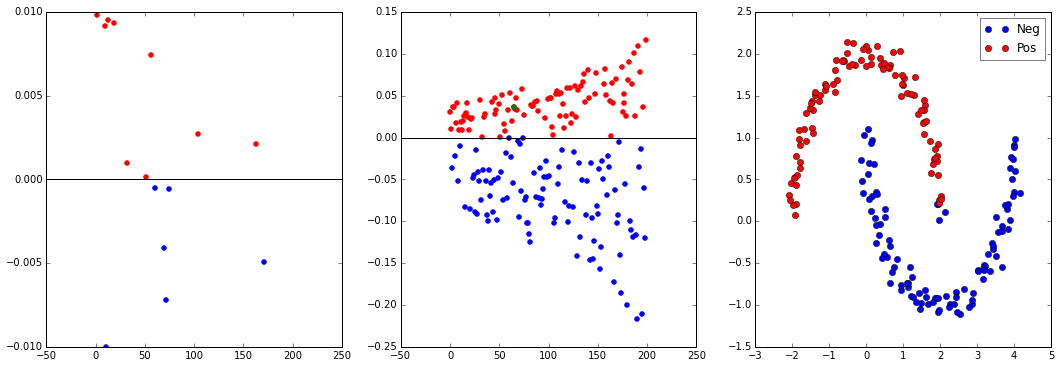

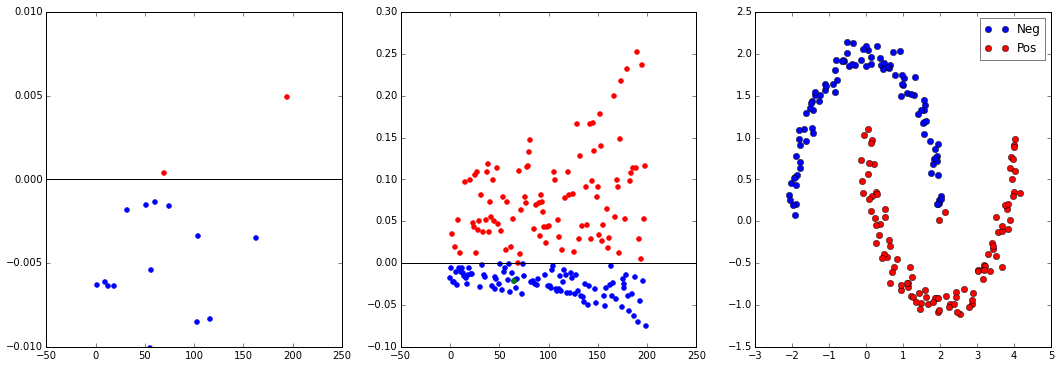

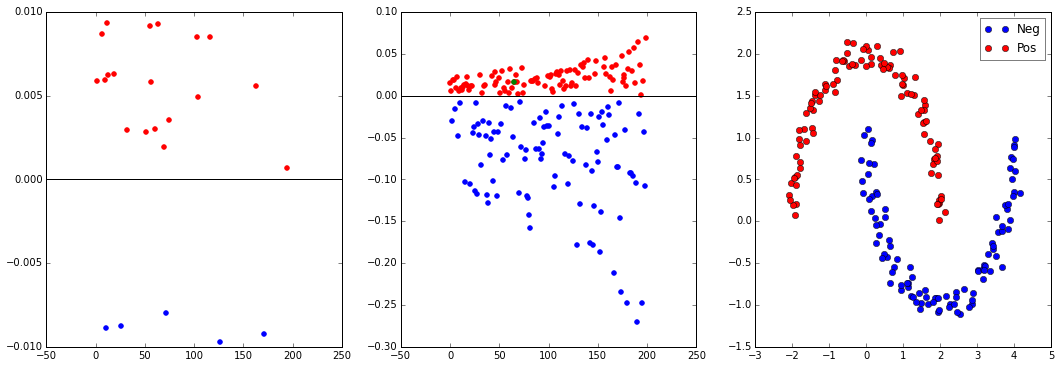

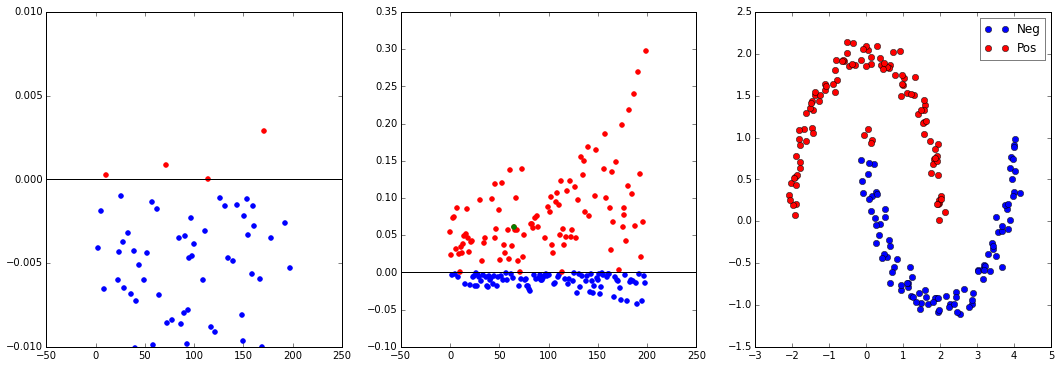

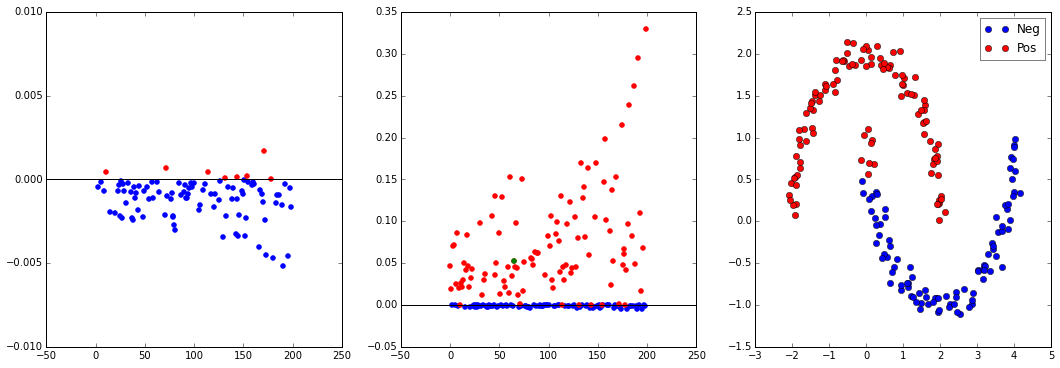

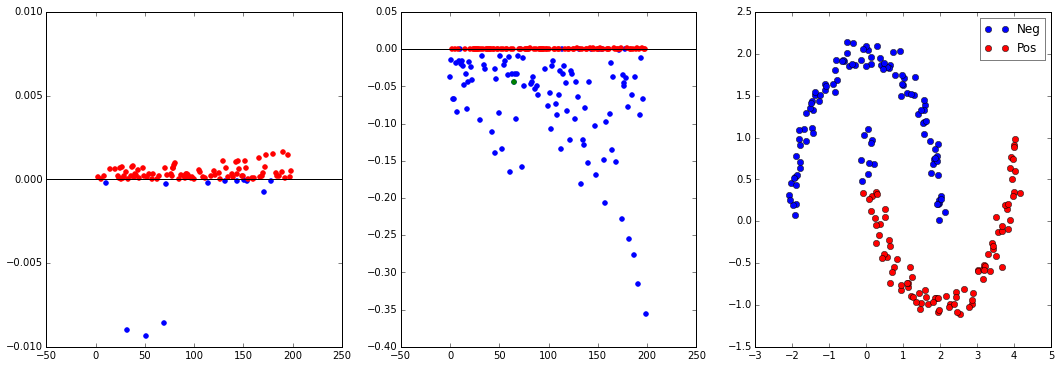

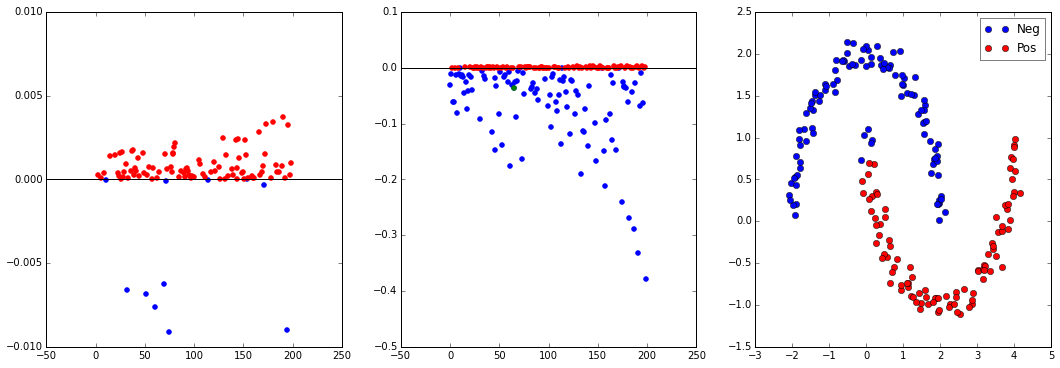

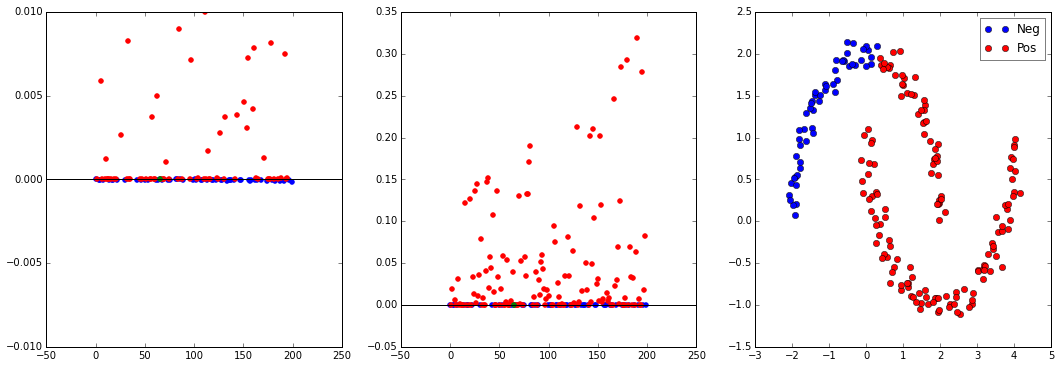

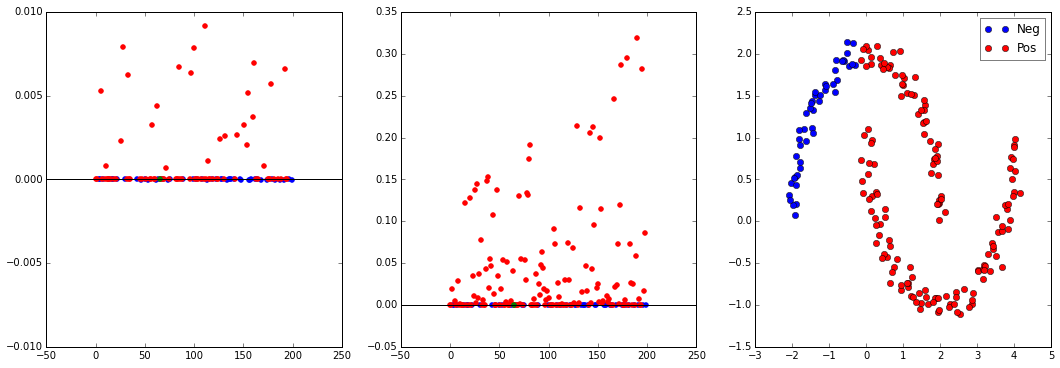

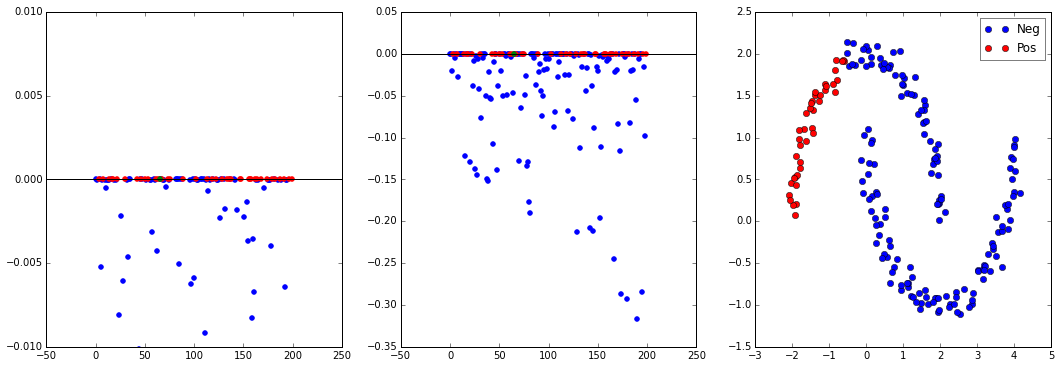

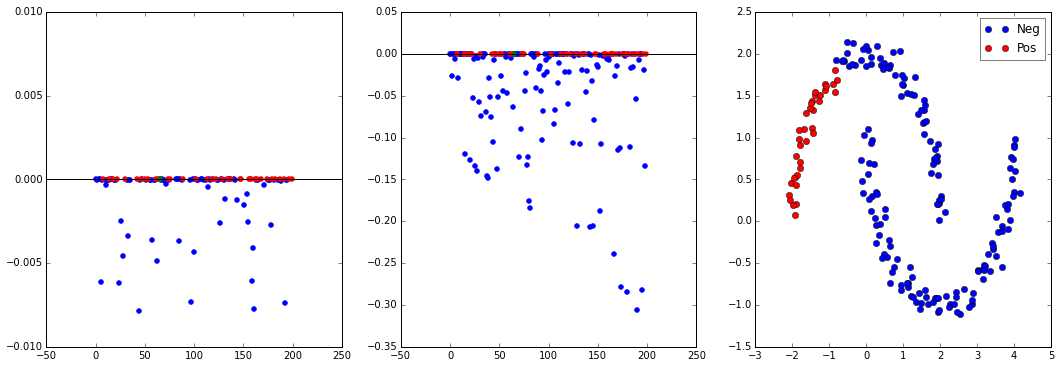

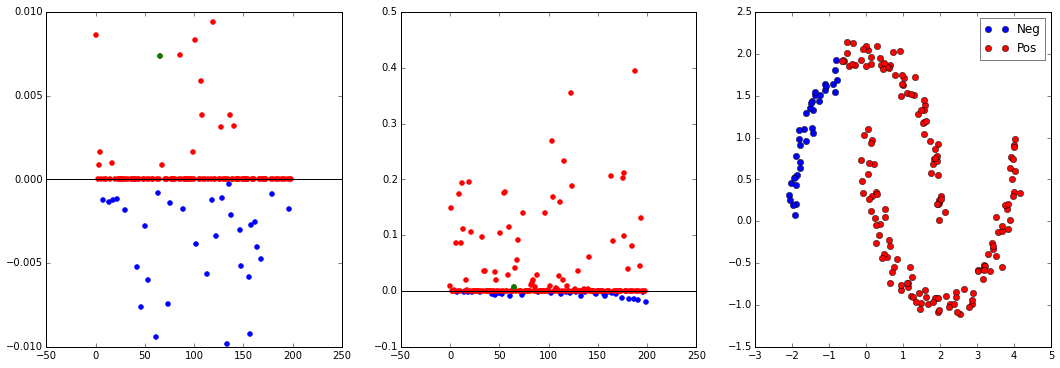

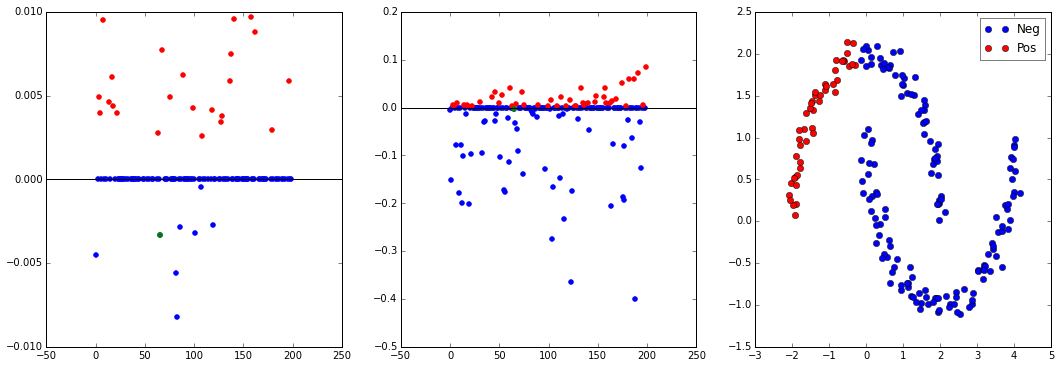

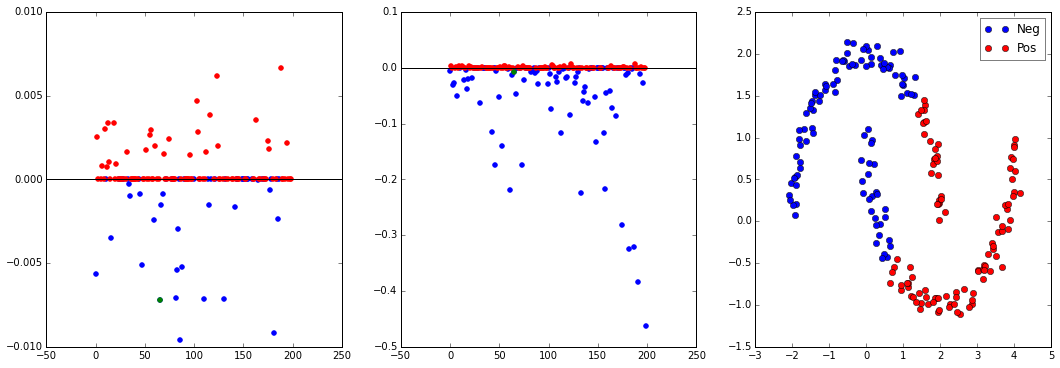

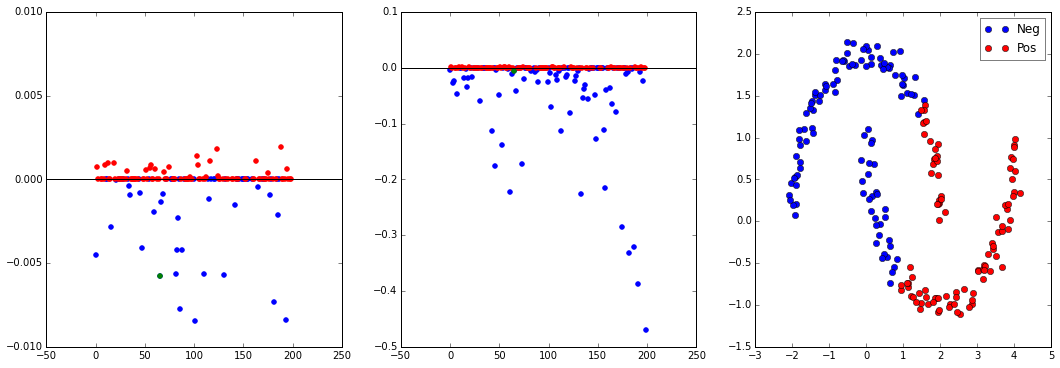

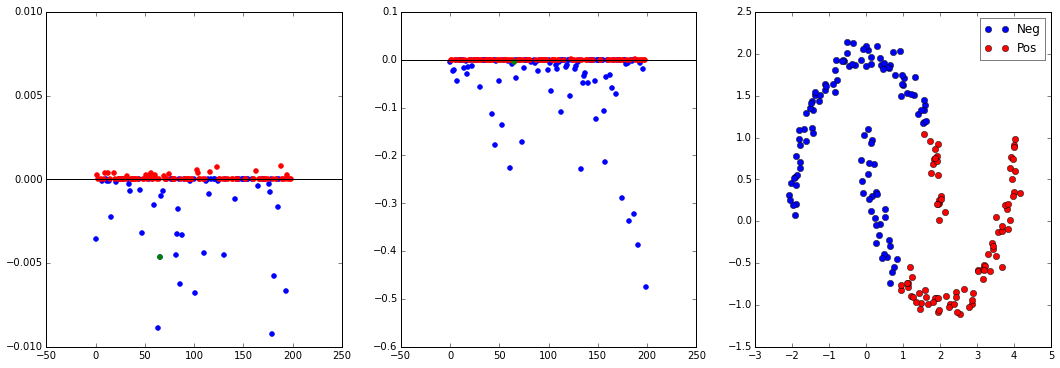

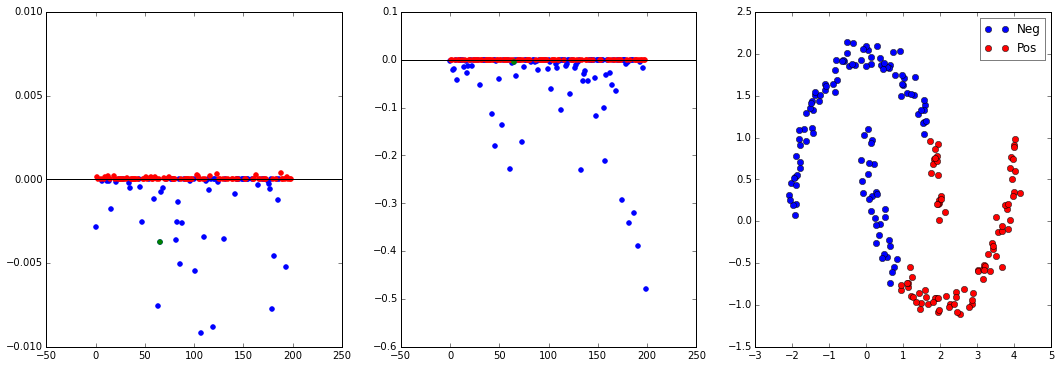

In [16]:
demo_2_5(my_data)

## Spectral Clustering using Andrew Ng's Algorithm
- On Spectral Clustering: Analysis and an algorithm by Andre Ng, etal.
- S = exp(-|x_i-x_j|^2 / 2*(sigma^2))
- D = diagonal matrix whose (i, i)-element is the sum of A's i-th row
- L = D^(-1/2)AD^(-1/2)
- FInd the k largest eigenvectors of L and normalized them into matrix X
- Treating X as new set of data, apply k-means clustering
- Based on the clustering result to cluster the original data

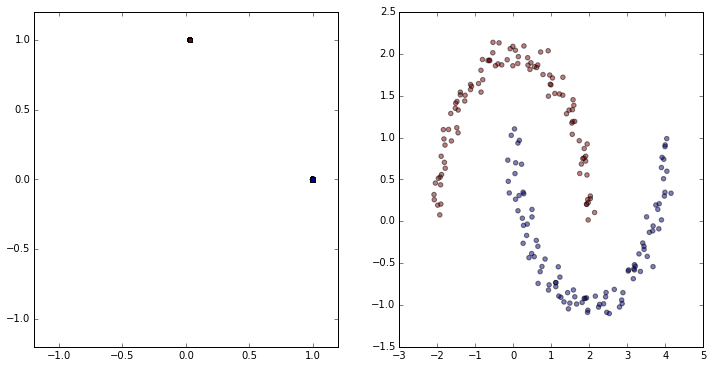

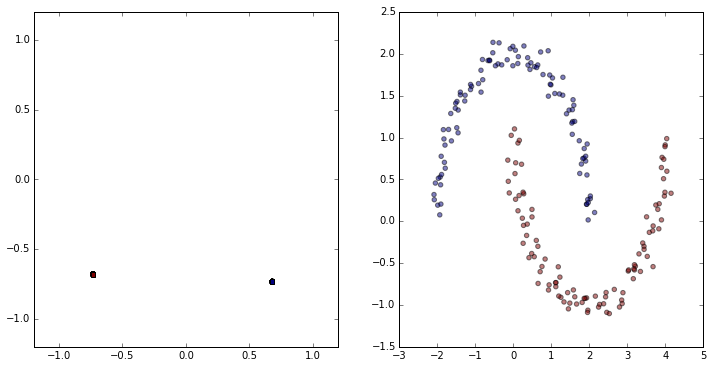

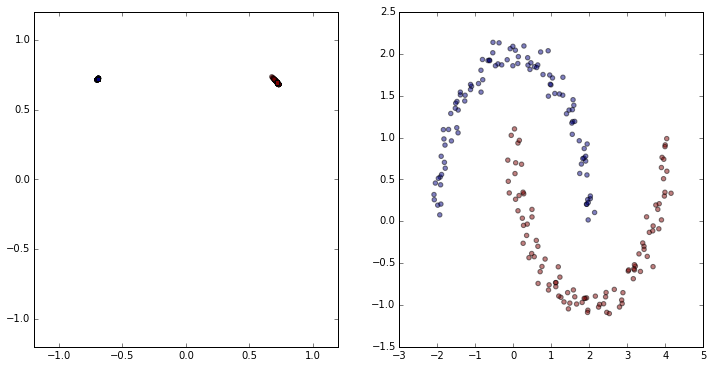

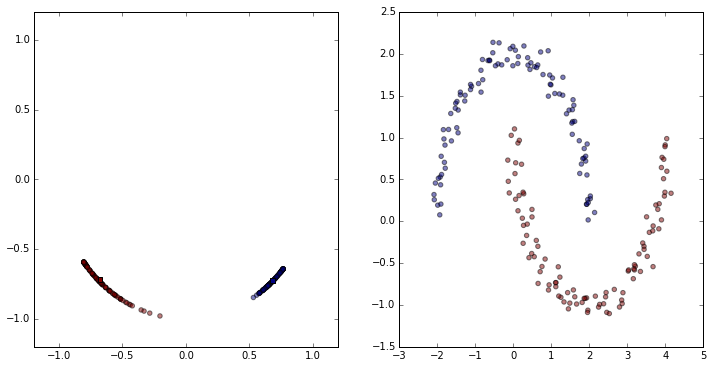

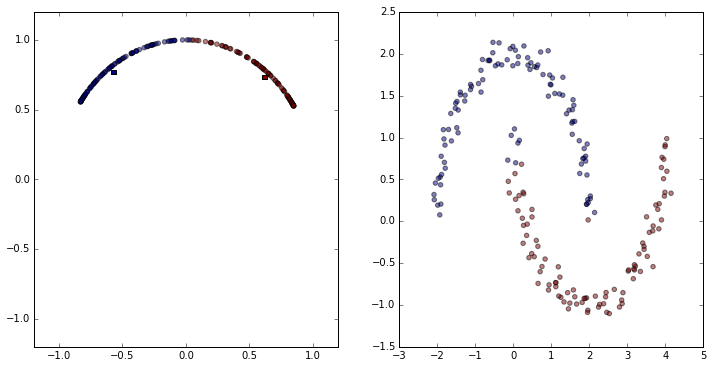

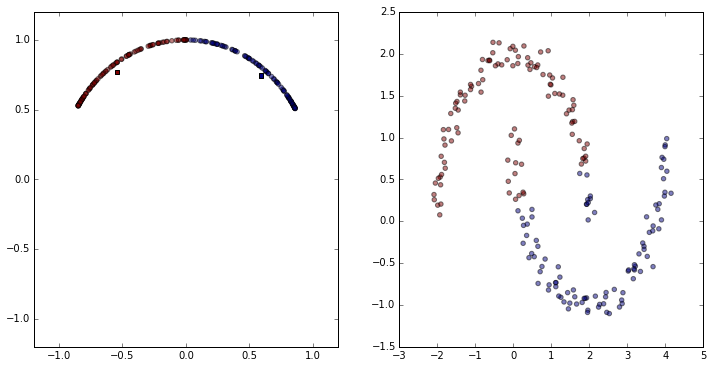

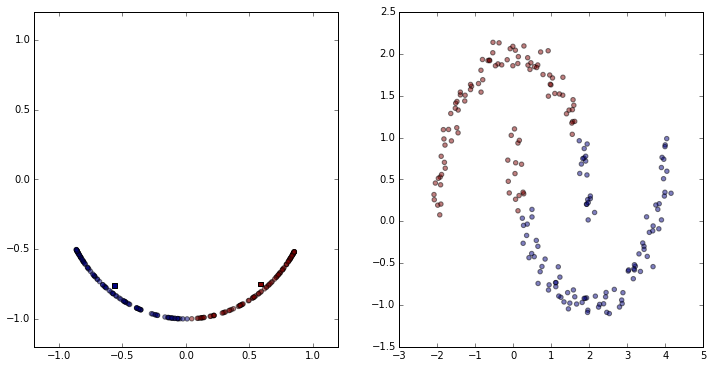

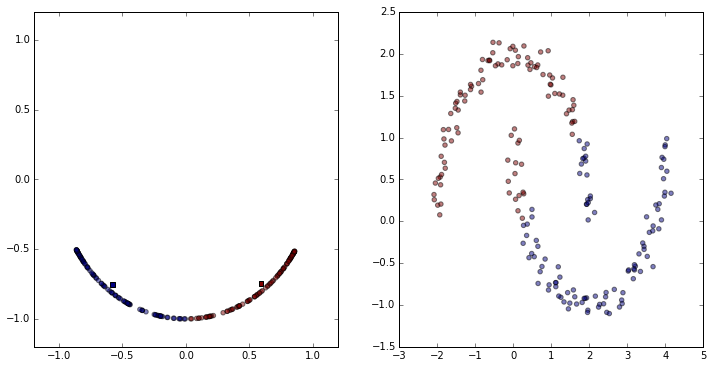

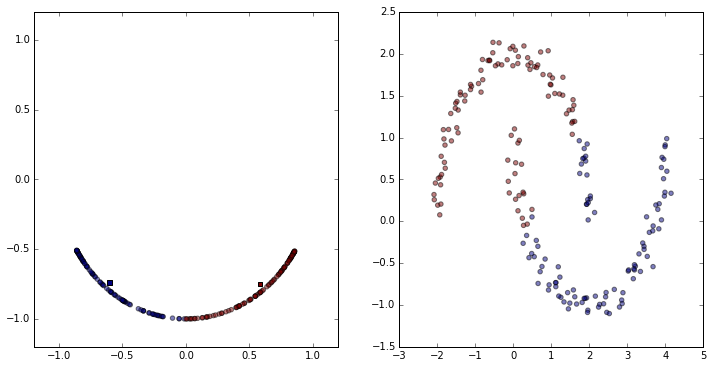

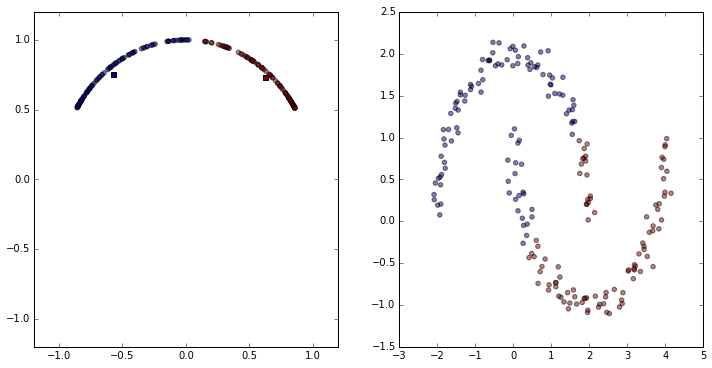

In [19]:
scan_rex.demo1(my_data,2, 0.05, 1, 0.1)  #(my_data,k, sigma, start, end, step):

### Shuffle the data order to see the result
- We would have same L on differnet odering of data
- As prediction, the resulting sigma would not change

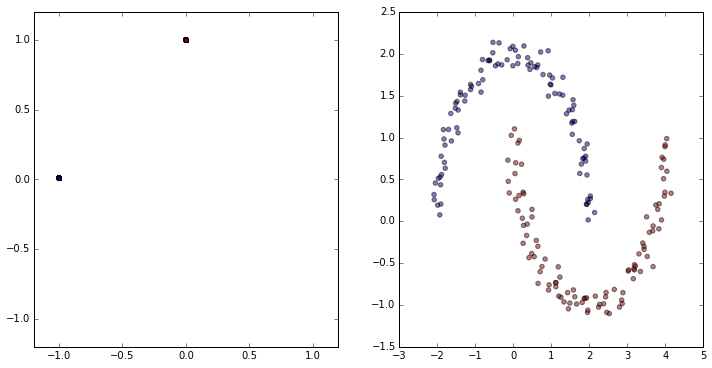

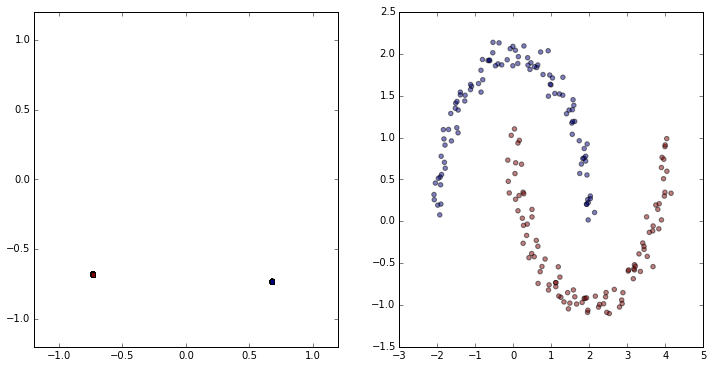

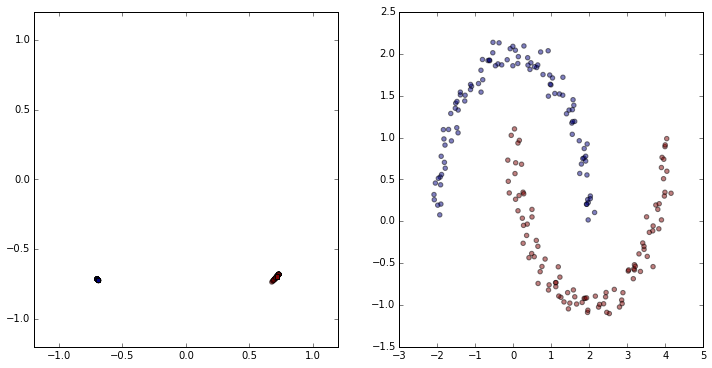

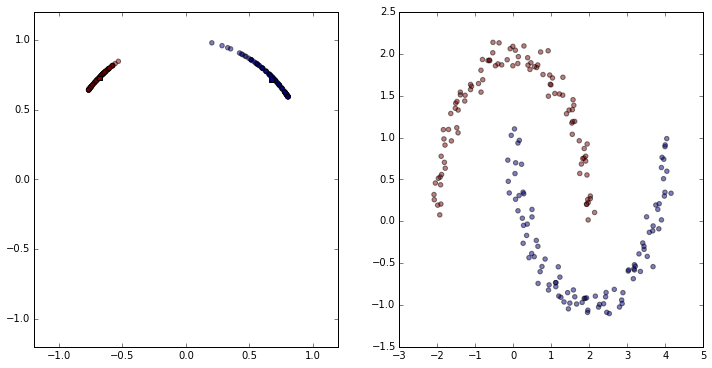

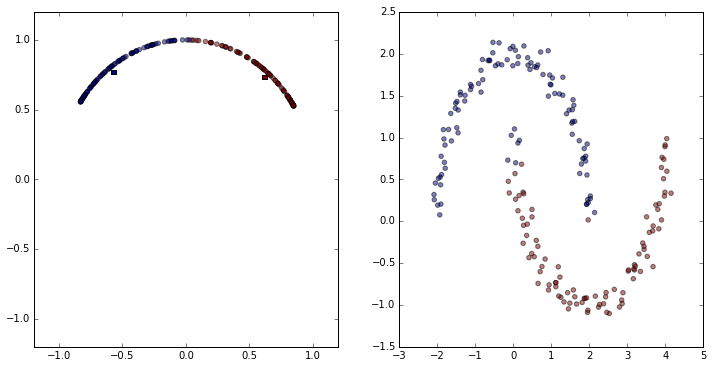

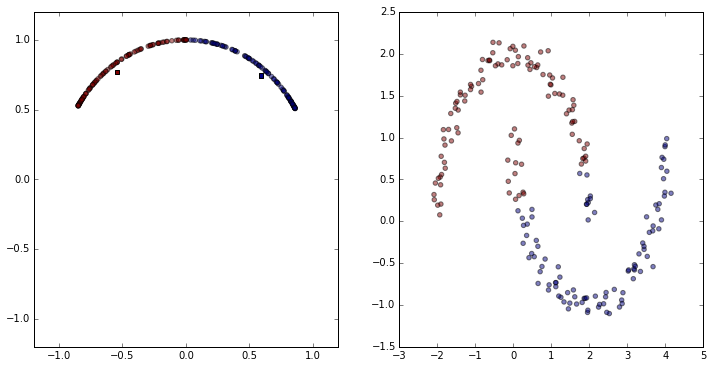

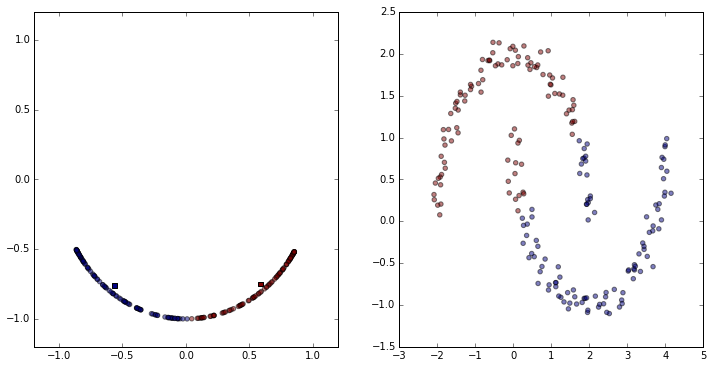

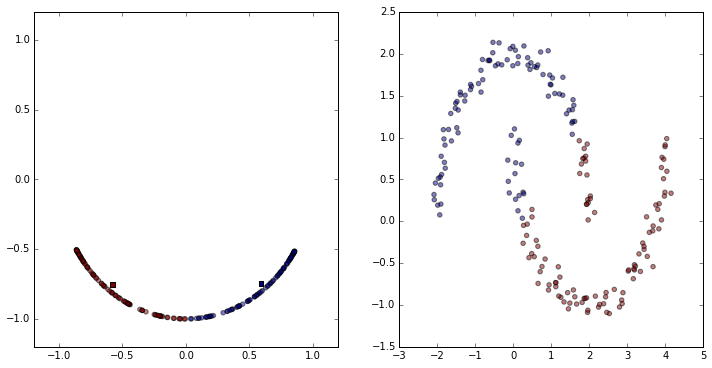

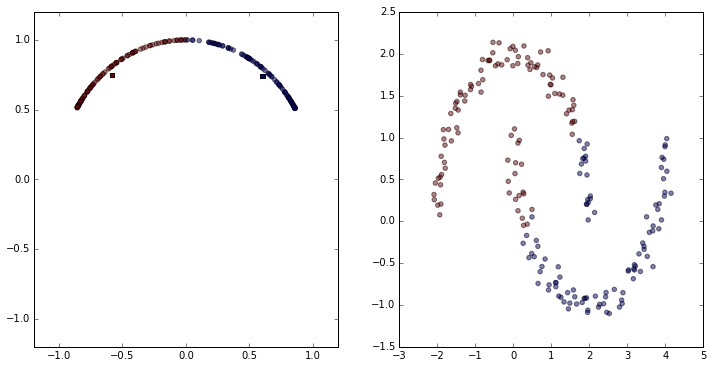

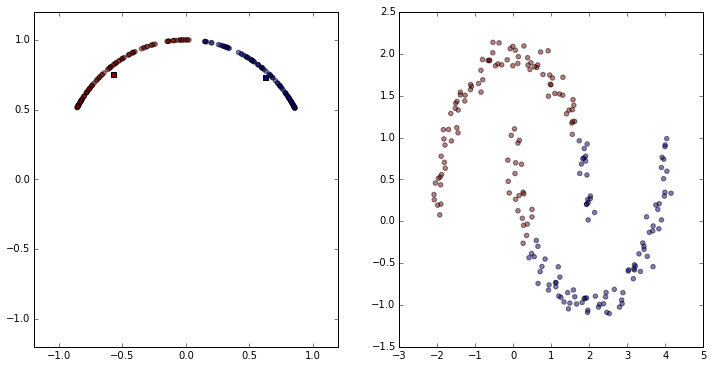

In [20]:
idx = np.arange(0,200,1)
np.random.shuffle(idx)
scan_rex.demo1(my_data[:,idx],2, 0.05, 1, 0.1)  #(my_data,k, sigma, start, end, step):

## Discussion
- Even if the data is shuffled, the sigma to generate good clustering is stable.
- We could evaluate the result based on how tight the processed group is.
- It is easier to determine whether this Y is valid or not.

## Evaluate the tightness of Data
- Variance
- Support Vector Machine

## Task 3.3
### Dimensionality Reduction
***

In [2]:
data_X = np.genfromtxt("./data/data-dimred-X.csv", delimiter=',')
data_y = np.genfromtxt("./data/data-dimred-y.csv", delimiter=',')

In [52]:
def demo_3(X, y, k, err=0.0, ddof=0, use_eigh=True, use_abs_evals=False):
    print("\n# PCA ######################################")
    res_pca = dim_rex.pca(X, k=k, err=err, 
                          use_eigh=use_eigh, use_abs_evals=use_abs_evals)
    
    print("\n# LDA ######################################")
    res_lda = dim_rex.lda(X, y, k=k, err=err, use_eigh=use_eigh, ddof=ddof, 
                          use_abs_evals=use_abs_evals)
        
    projections = [res_pca[0], res_lda[0]]
    classes = np.unique(y)
    
    
    # Plotting
    if k == 2:
        fig = plt.figure(figsize=(12, 6))
        sbp = [1, 2, 0]

        for p, t in zip(projections, ["{}D PCA".format(k), "{}D LDA".format(k)]):
            sbp[-1] += 1

            ax = fig.add_subplot(*sbp)
            for c, h in zip(classes, ['r.', 'g.', 'b.']):
                plt_rex.plot2d(p[y == c], False, 
                               axs=ax, hatch=h, show=False, 
                               title=t)
                
            ax.grid()
            ax.axhline(y=0)
            ax.axvline(x=0)
    elif k == 3:
        for p, t in zip(projections, ["{}D PCA".format(k), "{}D LDA".format(k)]):
            fig = plt.figure()
            axs = plt.axes(projection='3d')
            for l, c in zip([1., 2., 3.], ['r', 'g', 'b']):
                d2 = p[y == l]
                axs.scatter3D(d2[:, 0], d2[:, 1], d2[:, 2], c=c)
        
            axs.set_title(t)
            
    return res_pca, res_lda


# PCA ######################################
Found that choosing k as 2 will lead to at most error 59.310584579881876%

# LDA ######################################
Found 3 classes of 500 dimensional data
Class 1.0: 50 samples
Class 2.0: 50 samples
Class 3.0: 50 samples
Found that choosing k as 2 will lead to at most error -8019.271384515379%


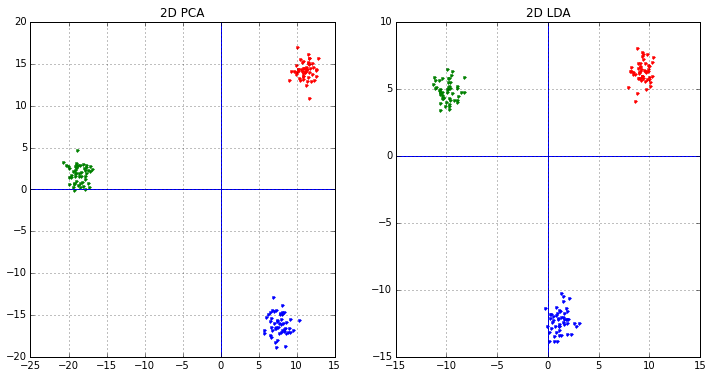

In [41]:
res_pca, res_lda = demo_3(data_X, data_y, 2)

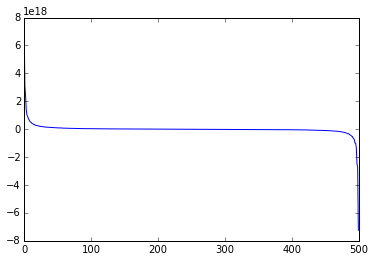

In [16]:
evals = res_lda[-1][0]
plt.plot(evals)


# PCA ######################################
Found that choosing k as 2 will lead to at most error 59.310584579881876%

# LDA ######################################
Found 3 classes of 500 dimensional data
Class 1.0: 50 samples
Class 2.0: 50 samples
Class 3.0: 50 samples
Found that choosing k as 2 will lead to at most error 77.29489861745998%


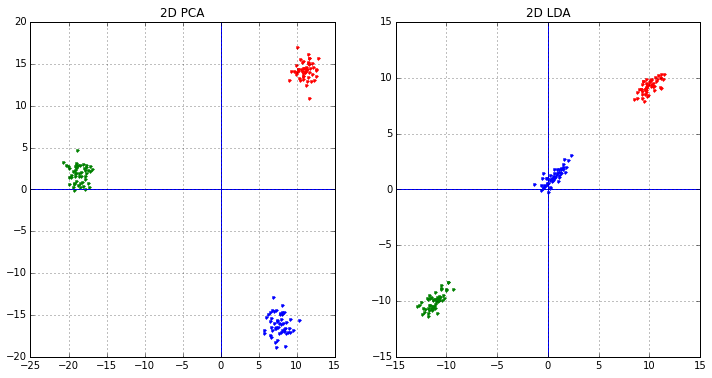

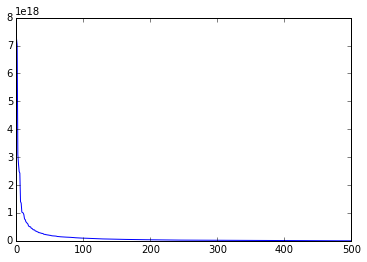

In [42]:
res_pca, res_lda = demo_3(data_X, data_y, 2, use_abs_evals=True)
plt.figure()
plt.plot(res_lda[-1][0])

### Let's see for 3D


# PCA ######################################
Found that choosing k as 3 will lead to at most error 58.37033070345618%

# LDA ######################################
Found 3 classes of 500 dimensional data
Class 1.0: 50 samples
Class 2.0: 50 samples
Class 3.0: 50 samples
Found that choosing k as 3 will lead to at most error 72.36080941543305%


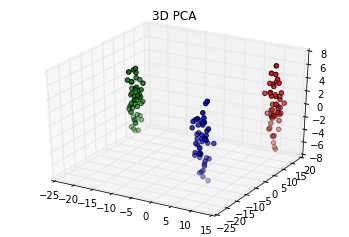

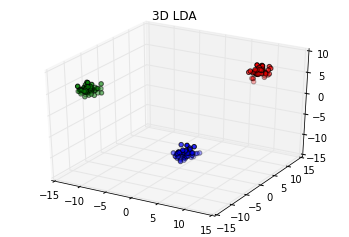

In [57]:
res_pca, res_lda = demo_3(data_X, data_y, 3, use_abs_evals=True)

### Observations

- **PCA** finds the axes with maximum variance for the *whole* data

    + *unsupervised* algorithm
    
    + performs better for fewer samples per class

- **LDA** finds the axes for best separation *between* classes

    + *supervised* algorithm
    
- **Both** still have the underlying assumption of data having Gaussian Distribution

## Task 3.4
### Exploring Numerical Instabilities
***

### We all read the paper

In general, we expected:

- `method_1` 
    + to give the best 10th degree polygon, 
    + be fast, 
    + not face issues 
- `method_2` 
    + to give okay result (conditionally)
    + be slow, 
    + to face numerical issues
- `method_3` 
    + to give a good 10th degree polygon, 
    + be fast,
    + not face issues
- `method_4`
    + to give results a bit better than `method_2`
    + be the slowest (added transform step)
    + not face issues in this particular case (may be)

### Let's test the expectations!

In [28]:
import numpy.linalg as la
import numpy.polynomial.polynomial as poly

# Read data
ws, hs, gs = read_whdata()
HW = np.vstack((hs, ws)).astype(np.float)

# removing outliers
HW_new, neg_idx = pre_rex.only_all_positive(HW, True, return_neg_idx=True)

# unknown
hu = np.array([h for i, h in enumerate(hs) if i in neg_idx])

hgt = HW_new[0, :]
wgt = HW_new[1, :]
xmin = hgt.min()-15
xmax = hgt.max()+15
ymin = wgt.min()-15
ymax = wgt.max()+15

x = np.linspace(xmin, xmax, 100)

def demo_4_plot(y, titles):
    fig = plt.figure(figsize=(8, 8))
    sp = [2, 2, 0]
    for i, t in enumerate(titles):
        sp[-1] += 1
        ax = fig.add_subplot(*sp)
        ax.plot(hgt, wgt, 'ko', x, y[i], 'r-')
        ax.set_xlim(xmin, xmax)
        ax.set_ylim(ymin, ymax)
        ax.set_title(t)
    

/Users/myrmidon/.conda/envs/pattrex/lib/python3.4/site-packages/numpy/polynomial/polynomial.py:1383: RankWarning: The fit may be poorly conditioned
  warnings.warn(msg, pu.RankWarning)


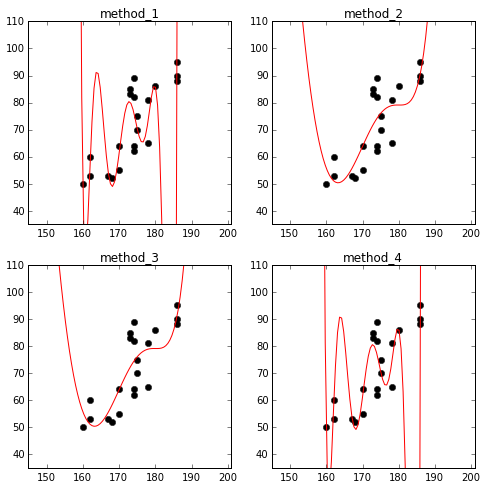

In [84]:
def trsf(x, div=100):
      return x / div
    
n = 10

def method_1(hgt=hgt, wgt=wgt, n=n, x=x):
    # regression using ployfit
    c = poly.polyfit(hgt, wgt, n)
    y = poly.polyval(x, c) 
    return c, y

def method_2(hgt=hgt, wgt=wgt, n=n, x=x):
    # regression using the Vandermonde matrix and pinv 
    X = poly.polyvander(hgt, n)
    c = np.dot(la.pinv(X), wgt)
    y = np.dot(poly.polyvander(x,n), c) 
    return c, y

def method_3(hgt=hgt, wgt=wgt, n=n, x=x):
    # regression using the Vandermonde matrix and lstsq 
    X = poly.polyvander(hgt, n)
    c = la.lstsq(X, wgt)[0]
    y = np.dot(poly.polyvander(x,n), c)
    return c, y

def method_4(hgt=hgt, wgt=wgt, n=n, x=x, div=100):
    # regression on transformed data using the Vandermonde 
    #    matrix and pinv
    X = poly.polyvander(trsf(hgt, div=div), n)
    c = np.dot(la.pinv(X), wgt)
    y = np.dot(poly.polyvander(trsf(x, div=div),n), c)
    return c, y

demo_4_plot([m()[1] for m in [method_1, method_2, method_3, method_4]], 
            [m for m in ["method_1", "method_2", "method_3", "method_4"]])

### What happend?

- Warning raised by polyfit

    + **abdullah:** it is actually helpful
    
- `method_4` gives almost as 'good' a result as `method_1`

    + **can:** the `trsf` function is scaling the values by 1/100 
    + **cifong:** problems with raising $10^2$ values to powers of 10 might be getting resolved
    + **abdullah:** actually, no. Look at the coefficients. All are of order $10^{10}$

In [60]:
coeffs = np.array([m()[0] for m in [method_1, method_2, method_3, method_4]])
print(coeffs.T)

[[  9.94143754e+11   3.39741629e-19   3.39741629e-19   5.01564415e+11]
 [ -3.61297680e+10   1.17900058e-11   1.17900058e-11  -1.40808912e+12]
 [  5.01765490e+08  -9.63490518e-15  -9.63490518e-15   9.77502398e+11]
 [ -2.82817017e+06   2.89518900e-13   2.89518900e-13   7.51115288e+11]
 [ -1.94892561e+03   2.13966507e-11   2.13966507e-11  -1.10264539e+12]
 [  9.06665686e+01   1.23047796e-09   1.23047796e-09  -3.67718543e+11]
 [ -1.48086662e-01   4.24710787e-08   4.24710787e-08   1.39301069e+12]
 [ -2.67679787e-03  -9.78013259e-10  -9.78013259e-10  -1.08608618e+12]
 [  1.75196332e-05   8.43625378e-12   8.43625378e-12   4.20281052e+11]
 [ -4.38544409e-08  -3.23109114e-14  -3.23109114e-14  -8.41040291e+10]
 [  4.13603892e-11   4.63624155e-17   4.63624155e-17   6.97330421e+09]]


/Users/myrmidon/.conda/envs/pattrex/lib/python3.4/site-packages/numpy/polynomial/polynomial.py:1383: RankWarning: The fit may be poorly conditioned
  warnings.warn(msg, pu.RankWarning)


- **umut:** Let's Time them

In [78]:
%timeit method_1()
%timeit method_2()
%timeit method_3()
%timeit method_4()

1000 loops, best of 3: 263 µs per loop
10000 loops, best of 3: 182 µs per loop
10000 loops, best of 3: 181 µs per loop
10000 loops, best of 3: 180 µs per loop


/Users/myrmidon/.conda/envs/pattrex/lib/python3.4/site-packages/numpy/polynomial/polynomial.py:1383: RankWarning: The fit may be poorly conditioned
  warnings.warn(msg, pu.RankWarning)


- **abdullah:** the dataset is too small. Run again with 1000 copies
    + it is still in milliseconds
    + **can:** don't go above 100,000 

In [81]:
hgt_11 = np.tile(hgt, (1000))
wgt_11 = np.tile(wgt, (1000))
print(hgt_11.shape[0])

%timeit method_1(hgt_11, wgt_11)
%timeit method_2(hgt_11, wgt_11)
%timeit method_3(hgt_11, wgt_11)
%timeit method_4(hgt_11, wgt_11)

21000
100 loops, best of 3: 5.55 ms per loop
100 loops, best of 3: 8.41 ms per loop
100 loops, best of 3: 3.81 ms per loop
100 loops, best of 3: 8.69 ms per loop


/Users/myrmidon/.conda/envs/pattrex/lib/python3.4/site-packages/numpy/polynomial/polynomial.py:1383: RankWarning: The fit may be poorly conditioned
  warnings.warn(msg, pu.RankWarning)


- **cifong:** Let me dive into the transformation

### How do results change for `method_4` for different divisors

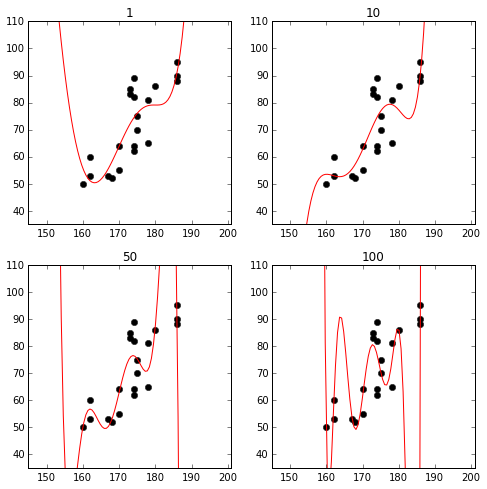

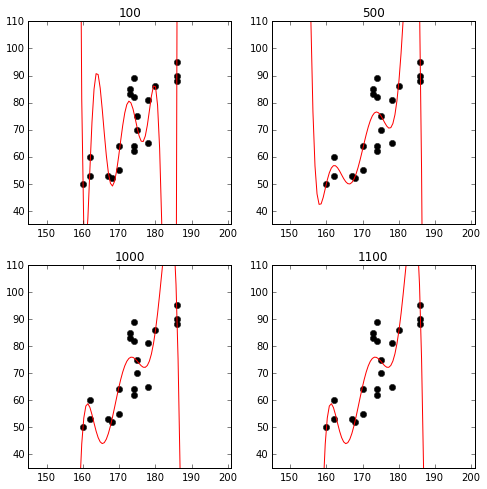

In [96]:
ys = []
for d in [1, 10, 50, 100]:
    ys.append(method_4(div=d)[1])
    
demo_4_plot(ys, [1, 10, 50, 100])
ys = []
for d in [100, 500, 1000, 1100]:
    ys.append(method_4(div=d)[1])
    
demo_4_plot(ys, [100, 500, 1000, 1100])

## The fitting dimention went up as the divisor goes up,
- The value in given data is 3 digit decimal, 
- divisor = 100 make the value to 1 digit

## Floating point issue in Python
- By Python Documentation
- 0.1(decimal) is presented as 
- 0.00011001100110011001100110011001100110011001100110011010(Binary)
- Print (0.1)
- 0.1000000000000000055511151231257827021181583404541015625
- https://docs.python.org/2/tutorial/floatingpoint.html

In [89]:
print(np.finfo(np.float32))
print(np.finfo(np.float64))

Machine parameters for float32
---------------------------------------------------------------------
precision=  6   resolution= 1.0000000e-06
machep=   -23   eps=        1.1920929e-07
negep =   -24   epsneg=     5.9604645e-08
minexp=  -126   tiny=       1.1754944e-38
maxexp=   128   max=        3.4028235e+38
nexp  =     8   min=        -max
---------------------------------------------------------------------

Machine parameters for float64
---------------------------------------------------------------------
precision= 15   resolution= 1.0000000000000001e-15
machep=   -52   eps=        2.2204460492503131e-16
negep =   -53   epsneg=     1.1102230246251565e-16
minexp= -1022   tiny=       2.2250738585072014e-308
maxexp=  1024   max=        1.7976931348623157e+308
nexp  =    11   min=        -max
---------------------------------------------------------------------



## Looking in to `numpy.linalg.pinv`
- `numpy.linalg.pinv(a, rcond=1e-15)`
- `rcond` is the precision of float 64, which `linalg` supports
- we found this code inside 

In [ ]:
a, wrap = _makearray(a)
_assertNoEmpty2d(a)
a = a.conjugate()
u, s, vt = svd(a, 0)
m = u.shape[0]
n = vt.shape[1]
cutoff = rcond*maximum.reduce(s)
for i in range(min(n, m)): 
    if s[i] > cutoff:           #Suspicious part, set value to zero
        s[i] = 1./s[i]
    else:
        s[i] = 0.; 
res = dot(transpose(vt), multiply(s[:, newaxis], transpose(u)))
return wrap(res)

## Test this part
- See how many cutsin different divisor

In [90]:
from numpy.core import umath as um

def countPinvCutoff(a):
    
    rcond=1e-15
    a = um.conjugate(a)
    u,s,vt = la.svd(a,0)
    sNoCut = np.copy(s)
    m = u.shape[0]
    n = vt.shape[1]
    cutoff = rcond*um.maximum.reduce(s)
    cutCount=0

    for i in range(min(n, m)):
        if s[i] < cutoff:
            cutCount+=1
        
    return cutCount, cutoff

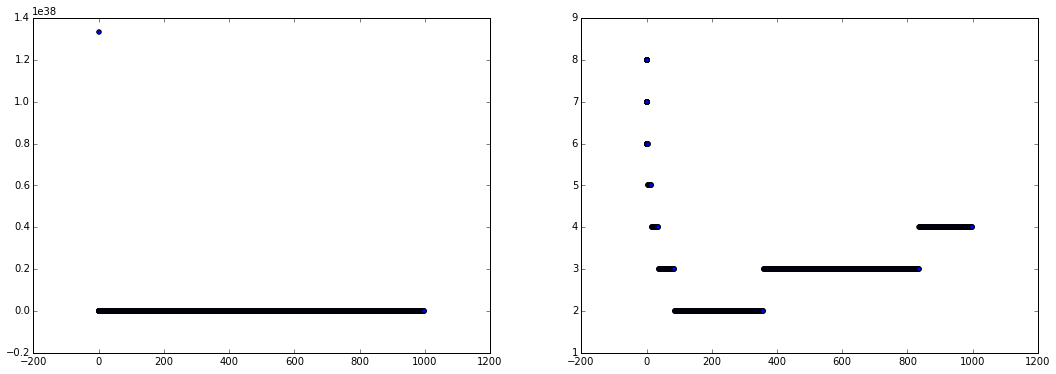

In [91]:
count = []
cutoffValue = []
inteNI = np.arange(0.001,1,0.001)
intePI = np.arange(1,1000,1)
divisor = np.append(inteNI, intePI)
for i in divisor:
    X = poly.polyvander(trsf(hgt,i), n)
    cutCount, cutoff = countPinvCutoff(X)
    list.append(count, cutCount)
    list.append(cutoffValue, cutoff)

fig = plt.figure(figsize=(18, 6))
plt.subplot(121)
plt.scatter(divisor, cutoffValue)
plt.subplot(122)
plt.scatter(divisor, count)

## Discussion
- 1.Ther trend mathes the degeneration of fitting function that 
-   the lower the cut off, the higher remaining dimension we have
- 2.We would have at least 2 cutoffs in all divisor

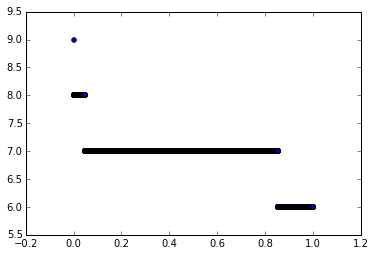

In [99]:
count = []
for i in np.arange(0.0001,1,0.0001):
    X = poly.polyvander(trsf(hgt,i), n)
    count.append(countPinvCutoff(X)[0])
    
plt.scatter(np.arange(0.0001,1,0.0001), count)

In [102]:
def pinv(a):
    
    cntCO=0
    cntTol=0
    rcond=1e-15
    a = um.conjugate(a)
    u,s,vt = la.svd(a,0)
    sNoCut = np.copy(s)
    m = u.shape[0]
    n = vt.shape[1]
    cutoff = rcond*um.maximum.reduce(s)
    tolerence = max(m,n)*um.maximum.reduce(s)*rcond
#     print("calculated cutoff",cutoff)
#     print("calculated tolerence",tolerence)
    for i in range(min(n, m)):
        if s[i] < cutoff:
            cntCO+=1
        if s[i] > tolerence:
            s[i] = 1./s[i]
            sNoCut[i]=1./sNoCut[i]
        else:
            cntTol+=1
            s[i] = 0.
            sNoCut[i]=1./sNoCut[i]
        
       
    res = np.dot(vt.T,um.multiply(s[:,np.newaxis], u.T))
    resNoCut = np.dot(vt.T,um.multiply(sNoCut[:,np.newaxis], u.T))
    
    return res, resNoCut, tolerence, cutoff, cntTol, cntCO
#     resNoCut = np.dot(vt.T,um.multiply(sNoCut[:,np.newaxis], u.T))

def demoPic(divisor):
    xmin = hgt.min() - 10
    xmax = hgt.max() + 10
    ymin = wgt.min() - 200
    ymax = wgt.max() + 200
    X = poly.polyvander(trsf(hgt,divisor), n)
    inv, invN, tol, co, cntTol, cntCO = pinv(X)
    
    print("divisor: %4.4f, tolerence: %4.16f, tolCount:%2d, cutoff:%4.16f, CoCount:%2d" % 
          (divisor, tol, cntTol, co, cntCO))
    
    cL = np.dot(la.pinv(X), wgt)
    yL = np.dot(poly.polyvander(trsf(x,divisor),n), cL)
    
    c = np.dot(inv, wgt)
    y = np.dot(poly.polyvander(trsf(x,divisor),n), c)
    
    fig = plt.figure(figsize=(18, 6))
    plt.subplot(131)
    plt.title("Use own defined threshold (tolerence)")
    plt.plot(hgt, wgt, 'ko',x, y, 'r-')
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    
    plt.subplot(132)
    plt.title("numpy.linalg.pinv theshold (cutoff)")
    plt.plot(hgt, wgt, 'ko',x, yL, 'r-')
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

    cN = np.dot(invN, wgt)
    yN = np.dot(poly.polyvander(trsf(x,divisor),n), cN)
    plt.subplot(133)
    plt.title("Without Cutoff")
    plt.plot(hgt, wgt, 'ko',x, yN, 'r-')
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.show()

## Plot some divisors on 3 variants
- Compare with the tolerence = epslon * max(m,n) * maximum(s)
- linalg.inv cutoff = epslon * maximum(s)
- No cut off

divisor: 0.0100, tolerence: 279582202827253860620707037184.0000000000000000, tolCount: 8, cutoff:13313438229869231143982727168.0000000000000000, CoCount: 8


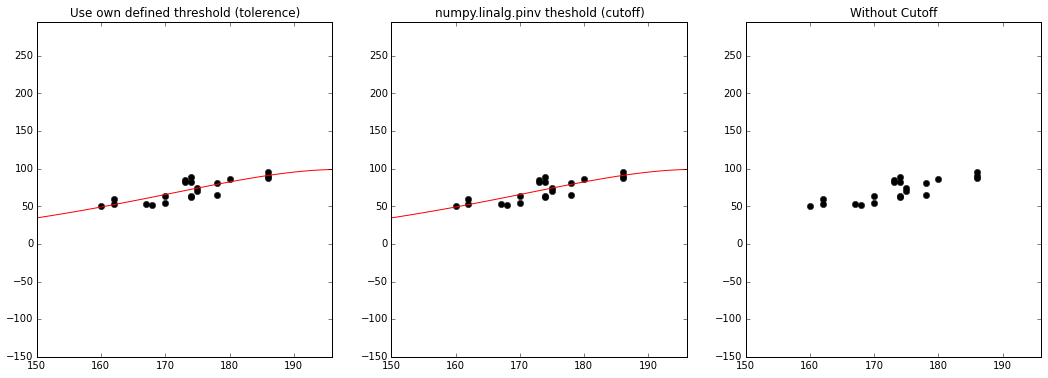

divisor: 0.0500, tolerence: 28629218642458107183104.0000000000000000, tolCount: 8, cutoff:1363296125831338524672.0000000000000000, CoCount: 7


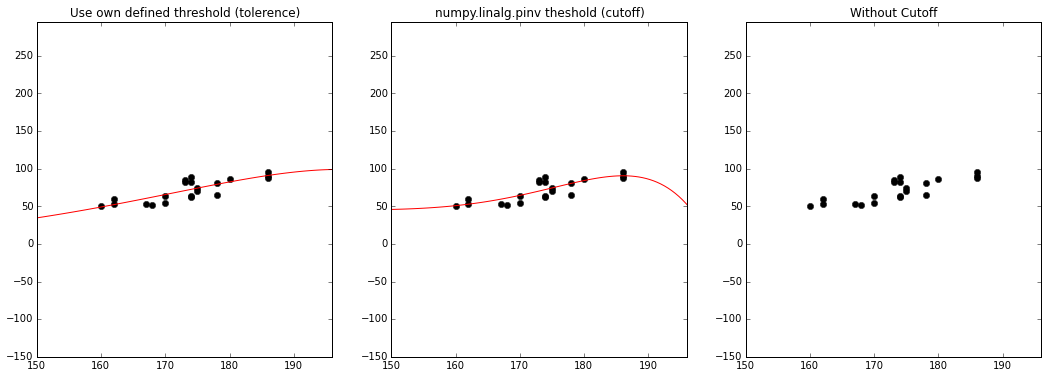

divisor: 0.1000, tolerence: 27958224604901580800.0000000000000000, tolCount: 8, cutoff:1331344028804837376.0000000000000000, CoCount: 7


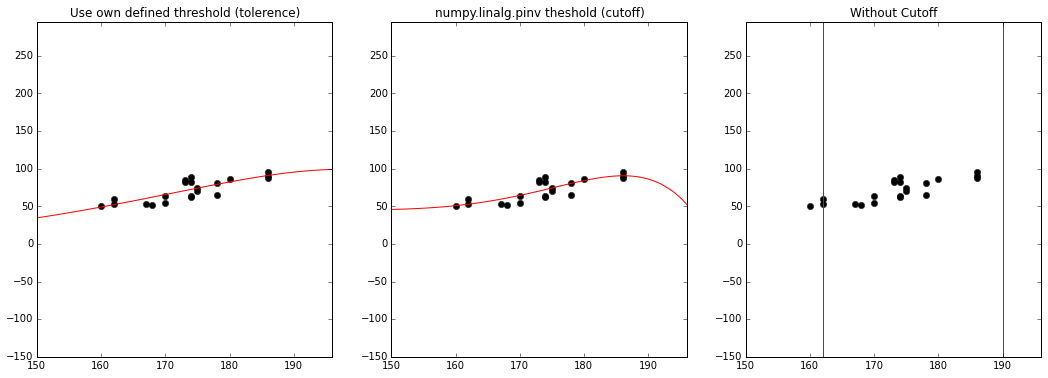

divisor: 0.5000, tolerence: 2862932929080.0292968750000000, tolCount: 7, cutoff:136330139480.0014038085937500, CoCount: 7


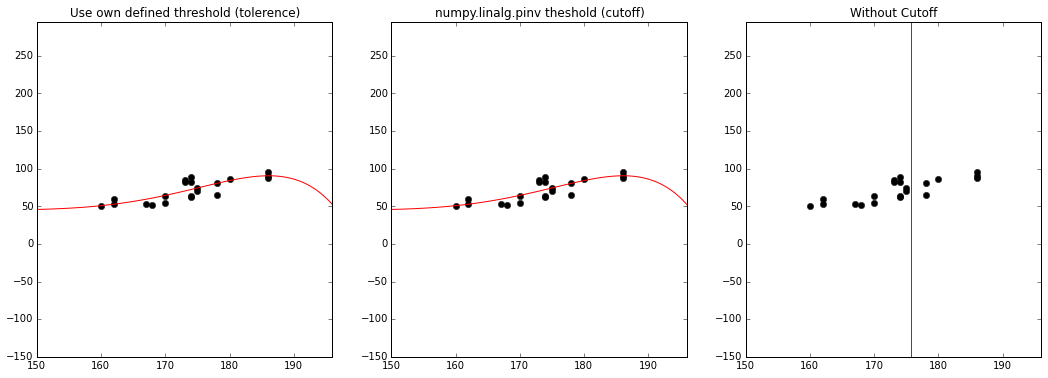

divisor: 1.0000, tolerence: 2795865683.2700839042663574, tolCount: 7, cutoff:133136461.1080992370843887, CoCount: 6


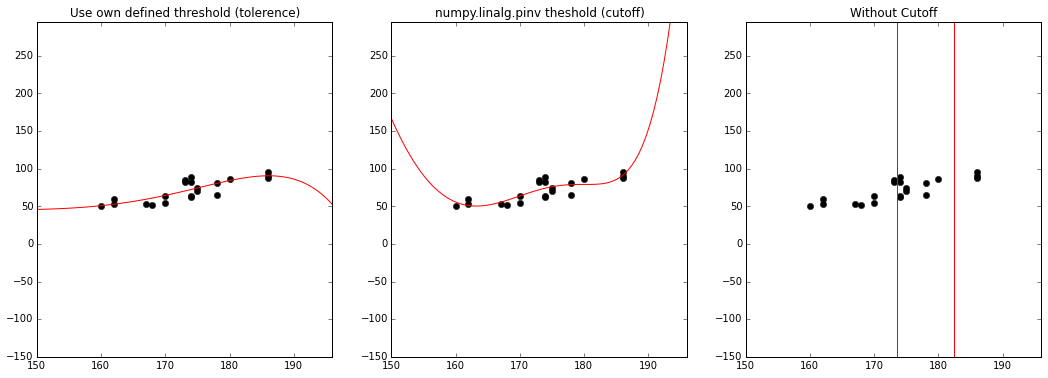

divisor: 5.0000, tolerence: 286.4040064468964601, tolCount: 6, cutoff:13.6382860212807824, CoCount: 5


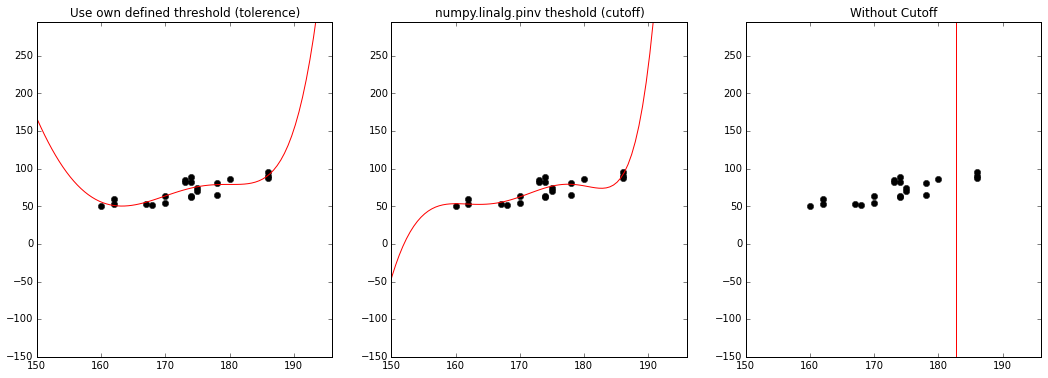

divisor: 10.0000, tolerence: 0.2800198168618731, tolCount: 5, cutoff:0.0133342769934225, CoCount: 5


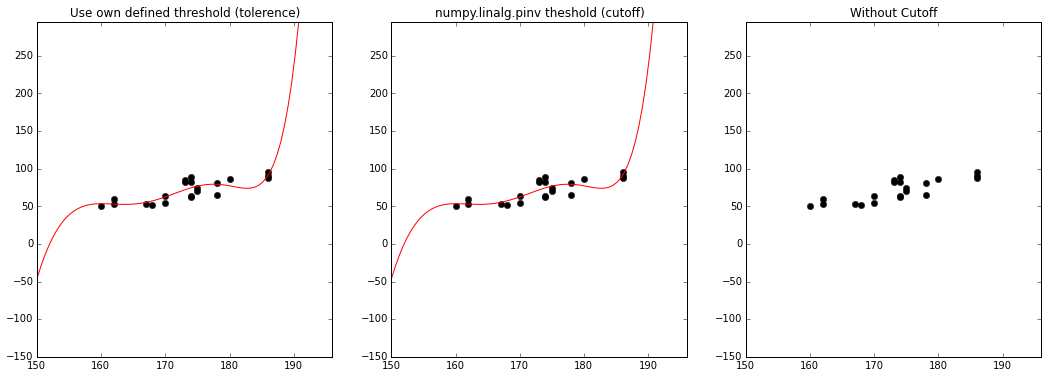

divisor: 50.0000, tolerence: 0.0000000298173451, tolCount: 4, cutoff:0.0000000014198736, CoCount: 3


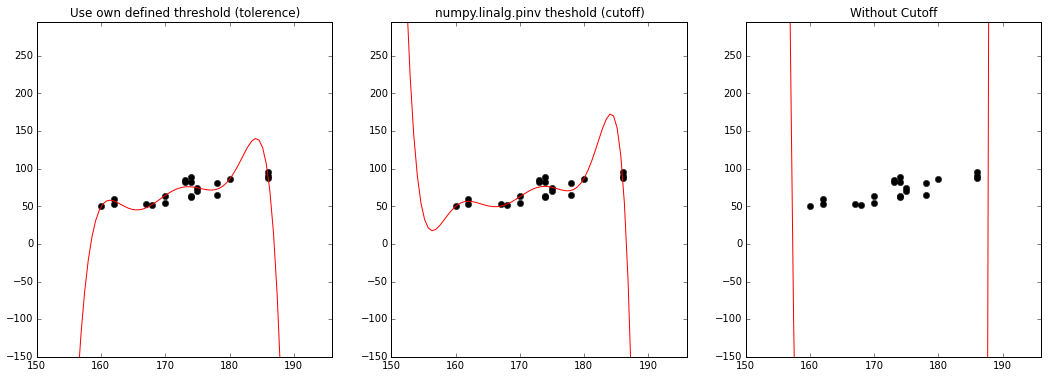

divisor: 100.0000, tolerence: 0.0000000000337292, tolCount: 3, cutoff:0.0000000000016062, CoCount: 2


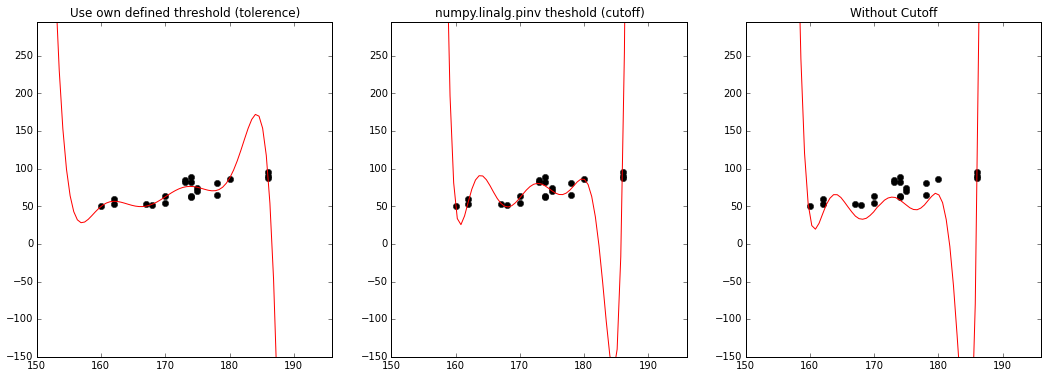

divisor: 500.0000, tolerence: 0.0000000000001026, tolCount: 3, cutoff:0.0000000000000049, CoCount: 3


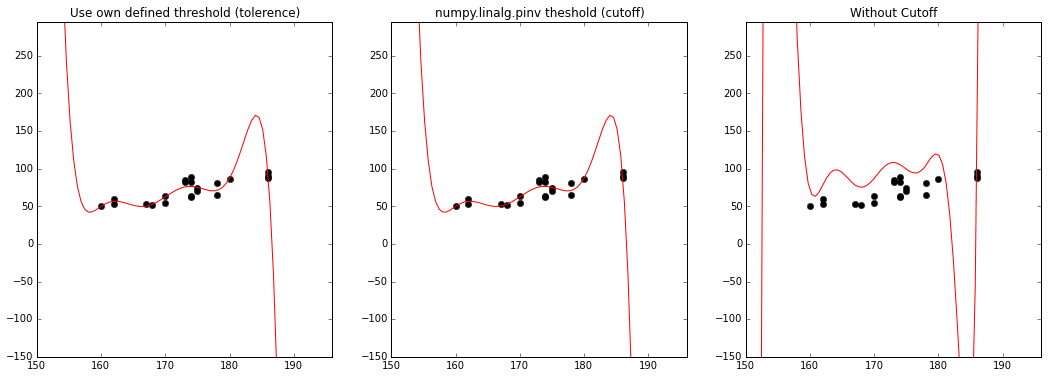

divisor: 1000.0000, tolerence: 0.0000000000000977, tolCount: 4, cutoff:0.0000000000000047, CoCount: 4


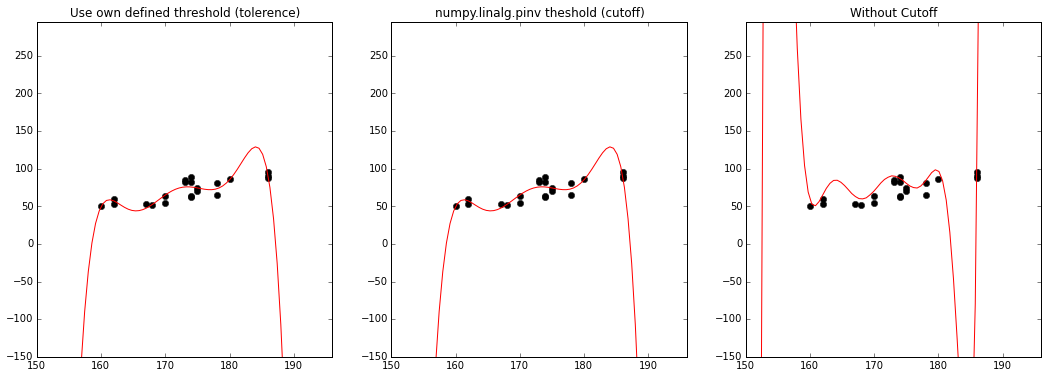

In [103]:
index = [0.01,0.05,0.1,0.5, 1,5, 10, 50, 100, 500, 1000]
for i in index:
    demoPic(i)

## References

- Slides
- C. Bauckhage.        Lecture Notes on Data Science: k-Means Clustering
- C. Bauckhage.        Lecture Notes on Data Science: Online k-Means Clustering
- Andre Ng, etal       On Spectral Clustering: Analysis and an algorithm
- A.M. Martinez et al. PCA vs. LDA 

***
## Questions?